C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44919 non-null  int64 
 1   title       44919 non-null  object
 2   text        44919 non-null  object
 3   subject     44898 non-null  object
 4   date        44898 non-null  object
 5   class       44919 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB
None
         Unnamed: 0         class
count  44919.000000  44919.000000
mean   11253.444801      0.476792
std     6525.299017      0.499467
min        0.000000      0.000000
25%     5614.500000      0.000000
50%    11229.000000      0.000000
75%    16844.000000      1.000000
max    23501.000000      1.000000
Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'class'], dtype='object')


C:\Users\Jaishree Krishna\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 200, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 580,501 (2.21 MB)

 Trainable params: 580,501 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
562/562 - 179s - 319ms/step - accuracy: 0.9546 - loss: 0.1213 - val_accuracy: 0.9767 - val_loss: 0.0723
Epoch 2/5
562/562 - 186s - 331ms/step - accuracy: 0.9810 - loss: 0.0590 - val_accuracy: 0.9861 - val_loss: 0.0500
Epoch 3/5
562/562 - 695s - 1s/step - accuracy: 0.9896 - loss: 0.0350 - val_accuracy: 0.9844 - val_loss: 0.0560
Epoch 4/5
562/562 - 441s - 785ms/step - accuracy: 0.9864 - loss: 0.0422 - val_accuracy: 0.9871 - val_loss: 0.0430
Epoch 5/5
562/562 - 207s - 369ms/step - accuracy: 0.9911 - loss: 0.0298 - val_accuracy: 0.9891 - val_loss: 0.0370
281/281 - 15s - 53ms/step - accuracy: 0.9891 - loss: 0.0370
Accuracy: 98.91%
281/281 - 305s - 1s/step - accuracy: 0.9891 - loss: 0.0370
Accuracy: 98.91%


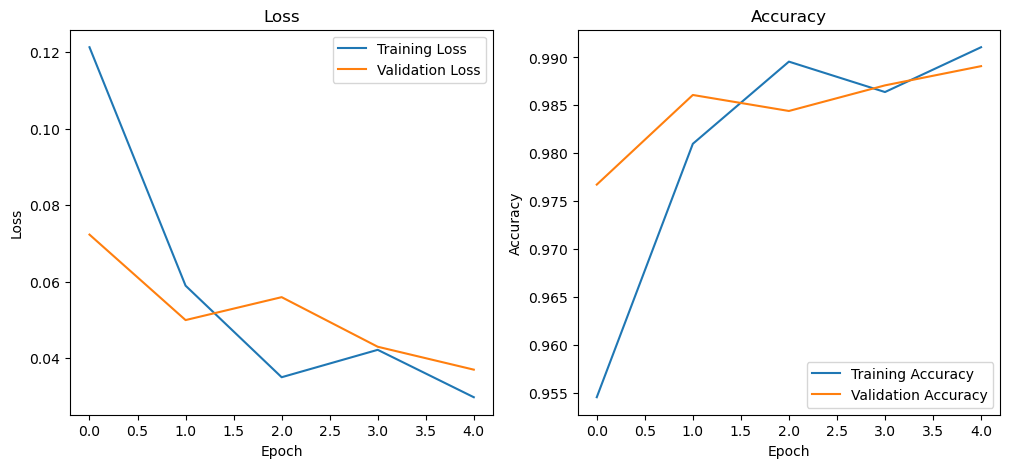

281/281 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step
              precision    recall  f1-score   support

        Real       0.99      0.99      0.99      4737
        Fake       0.99      0.99      0.99      4247

    accuracy                           0.99      8984
   macro avg       0.99      0.99      0.99      8984
weighted avg       0.99      0.99      0.99      8984



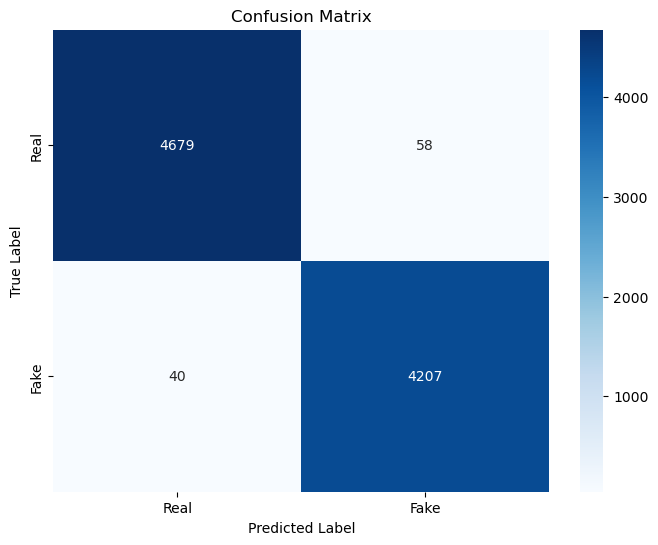

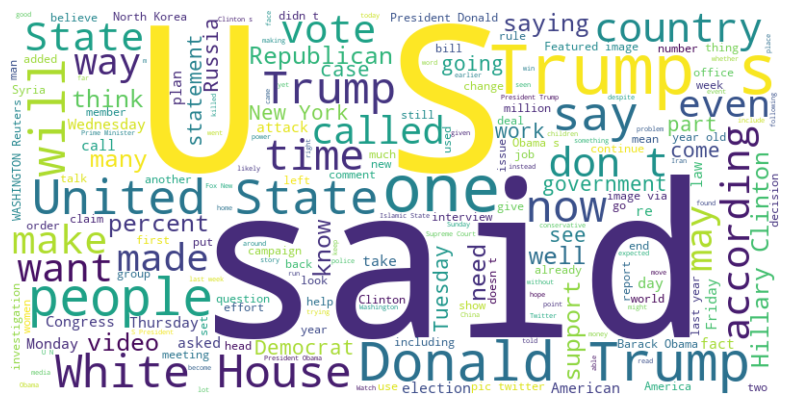

In [1]:
# FAKE NEWS DETECTION
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
df = pd.read_csv('D:/Datasets/News.csv')
print(df.info())
print(df.describe())
print(df.columns)

# Encode the labels (using the 'class' column instead of 'label')
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['class'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

# Define the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None, max_len))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(model.summary())


# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)


# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Accuracy: {accuracy * 100:.2f}%')

_# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Accuracy: {accuracy * 100:.2f}%')

import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    report = classification_report(y_test, y_pred, target_names=['Real', 'Fake'])
    cm = confusion_matrix(y_test, y_pred)
    return report, cm



import seaborn as sns

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()



plot_training_history(history)

report, cm = evaluate_model(model, X_test, y_test)
print(report)
plot_confusion_matrix(cm, labels=['Real', 'Fake'])



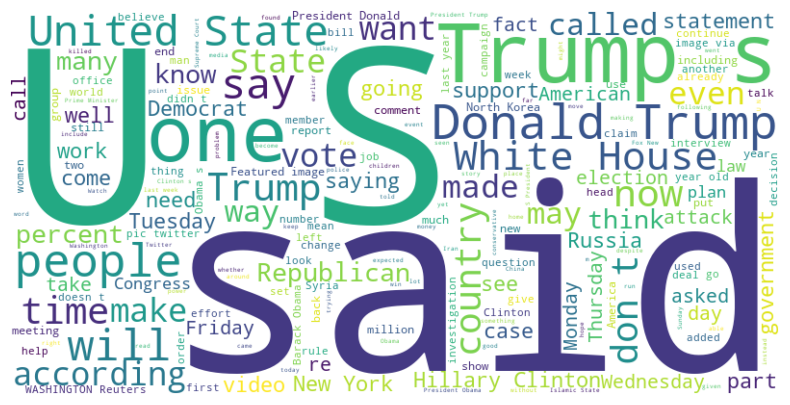

In [3]:

df['combined_text'] = df['title'] + ' ' + df['text']

# Combine all text into a single string
all_text = ' '.join(df['combined_text'].fillna(''))  # Handle any NaN values if they exist

# Example function to generate a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Plot the word cloud
plot_word_cloud(all_text)